# Acknowledgements

Turcan, E., & McKeown, K. (2019). Dreaddit: A Reddit dataset for stress analysis in social media. arXiv preprint arXiv:1911.00133.

# The relevant research paper link can be found here: -
https://aclanthology.org/D19-6213.pdf

In [ ]:
import re
from bs4 import BeautifulSoup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NASIF


####Nasif

In [ ]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')

train = pd.read_csv("/content/drive/MyDrive/BRACU/CSE431/Dataset/dreaddit-train.csv")
test = pd.read_csv("/content/drive/MyDrive/BRACU/CSE431/Dataset/dreaddit-test.csv")


df = [test,train]

df = pd.concat(df)
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [ ]:
df[["text","label"]].head(5)

,text,label
0,"Its like that, if you want or not.“ ME: I have...",0
1,I man the front desk and my title is HR Custom...,0
2,We'd be saving so much money with this new hou...,1
3,"My ex used to shoot back with ""Do you want me ...",1
4,I haven’t said anything to him yet because I’m...,0


#####FARDIN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import nltk
nltk.download('stopwords')

train = pd.read_csv("/content/drive/MyDrive/A-Data/431/dreaddit-train.csv")
test = pd.read_csv("/content/drive/MyDrive/A-Data/431/dreaddit-test.csv")


df = [test,train]

df = pd.concat(df)
df.head(2)

In [ ]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3553, 116)


### Preprocessing

In [ ]:
print("Duplicated rows before: ",df.duplicated().sum())
df.isnull().sum()

Duplicated rows before:  0


id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a heatmap using seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
# plt.title('Correlation Heatmap')
# plt.show()


In [ ]:
print("Duplicated rows before: ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicated rows after: ",df.duplicated().sum())

Duplicated rows before:  0
Duplicated rows after:  0


In [ ]:
# Initialize the stemmer and stopwords
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    sentence = BeautifulSoup(sentence, "html.parser").text

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
TAG_RE = re.compile(r'<[*%>]+>')

def remove_tags(text):
  return TAG_RE.sub('', text)


X=[]
sentences = list(df['text'])

for sen in sentences:
  X.append(preprocess_text(sen))
df["processed_text"]=X

<ipython-input-24-7058a450c79e>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentence = BeautifulSoup(sentence, "html.parser").text


In [ ]:
print('Pre Processed Data sample:')
df[["processed_text","label"]].head(5)

Pre Processed Data sample:


,processed_text,label
0,Its like that if you want or not ME have no pr...,0
1,I man the front desk and my title is HR Custom...,0
2,We be saving so much money with this new housr...,1
3,My ex used to shoot back with Do you want me t...,1
4,I haven said anything to him yet because m not...,0


<Axes: xlabel='label', ylabel='count'>

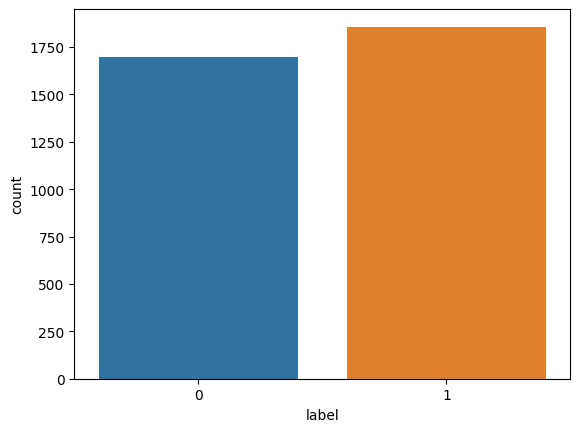

In [ ]:
import seaborn as sns
sns.countplot(x=df.label)

In [ ]:
y=df.label


####BERT

In [ ]:
df['Stress']=df['label'].apply(lambda x: 1 if x==1 else 0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['Stress'], test_size = 0.20, random_state = 42)

In [ ]:
X_train.head(4)

413     Also deflects my attempts at flirting. How do ...
2719    For ever since I can remember I have suffered ...
195     We've funnelled about 4k into saving our dog's...
532     But what should I say? Part of me wants to tel...
Name: text, dtype: object

In [ ]:
!pip install tensorflow_text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

Now lets import BERT model and get embeding vectors for few sample statements

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up",
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

Get embeding vectors for few sample words. Compare them using cosine similarity

In [ ]:
e = get_sentence_embeding([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

Values near to 1 means they are similar. 0 means they are very different. Above you can use comparing "banana" vs "grapes" you get 0.99 similarity as they both are fruits

In [ ]:
cosine_similarity([e[0]],[e[3]])

In [ ]:
cosine_similarity([e[3]],[e[4]])

Jeff bezos and Elon musk are more similar then Jeff bezos and banana as indicated above

#####Build Model

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
model.summary()

In [ ]:
len(X_train)

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

#####Train the model

In [ ]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
89/89 [==============================] - 42s 340ms/step - loss: 0.7048 - accuracy: 0.5303 - precision: 0.5450 - recall: 0.6259
Epoch 2/20
89/89 [==============================] - 29s 329ms/step - loss: 0.6860 - accuracy: 0.5595 - precision: 0.5654 - recall: 0.6877
Epoch 3/20
89/89 [==============================] - 31s 344ms/step - loss: 0.6702 - accuracy: 0.5932 - precision: 0.5943 - recall: 0.7045
Epoch 4/20
89/89 [==============================] - 31s 351ms/step - loss: 0.6574 - accuracy: 0.5982 - precision: 0.6042 - recall: 0.6756
Epoch 5/20
89/89 [==============================] - 31s 345ms/step - loss: 0.6479 - accuracy: 0.6214 - precision: 0.6204 - recall: 0.7146
Epoch 6/20
89/89 [==============================] - 32s 357ms/step - loss: 0.6463 - accuracy: 0.6256 - precision: 0.6226 - recall: 0.7246
Epoch 7/20
89/89 [==============================] - 31s 351ms/step - loss: 0.6369 - accuracy: 0.6369 - precision: 0.6309 - recall: 0.7394
Epoch 8/20
89/89 [================

In [ ]:
###By default Preprocessing
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
89/89 [==============================] - 33s 373ms/step - loss: 0.4964 - accuracy: 0.7579 - precision: 0.7572 - recall: 0.7918
Epoch 2/20
89/89 [==============================] - 32s 356ms/step - loss: 0.4933 - accuracy: 0.7600 - precision: 0.7592 - recall: 0.7938
Epoch 3/20
89/89 [==============================] - 32s 354ms/step - loss: 0.4972 - accuracy: 0.7519 - precision: 0.7523 - recall: 0.7851
Epoch 4/20
89/89 [==============================] - 32s 364ms/step - loss: 0.4888 - accuracy: 0.7600 - precision: 0.7578 - recall: 0.7965
Epoch 5/20
89/89 [==============================] - 32s 357ms/step - loss: 0.4905 - accuracy: 0.7548 - precision: 0.7565 - recall: 0.7844
Epoch 6/20
89/89 [==============================] - 32s 361ms/step - loss: 0.4867 - accuracy: 0.7643 - precision: 0.7644 - recall: 0.7952
Epoch 7/20
89/89 [==============================] - 36s 409ms/step - loss: 0.4892 - accuracy: 0.7544 - precision: 0.7543 - recall: 0.7878
Epoch 8/20
89/89 [================

In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 8s 343ms/step - loss: 0.4779 - accuracy: 0.7679 - precision: 0.7692 - recall: 0.7880


[0.4778757393360138,
 0.7679324746131897,
 0.7692307829856873,
 0.7880434989929199]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

23/23 [==============================] - 9s 340ms/step


In [ ]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[256,  87],
       [ 78, 290]])

Text(50.722222222222214, 0.5, 'Truth')

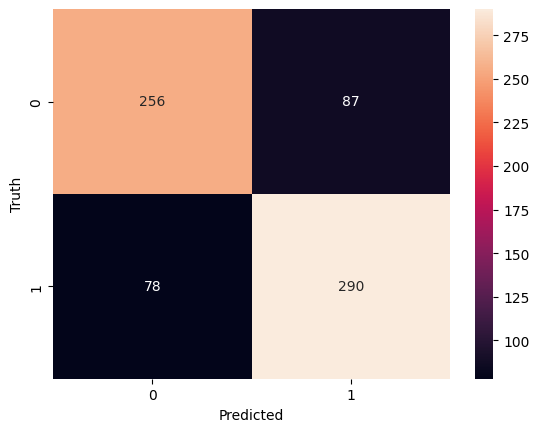

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       343
           1       0.77      0.79      0.78       368

    accuracy                           0.77       711
   macro avg       0.77      0.77      0.77       711
weighted avg       0.77      0.77      0.77       711



####DistilBert

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification,Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tqdm import tqdm
import os

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df'
# You might need to adjust the following lines depending on your data and columns

# Define the features and target variable
df["label"]=df["label"].map({0:"No Stress", 1:"Stress"})
X=X
y=list(df['label'])



In [ ]:
y[:5]

['No Stress', 'No Stress', 'Stress', 'Stress', 'No Stress']

In [ ]:
y=list(pd.get_dummies(y,drop_first=True)['Stress'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train[:5]

['Also deflects my attempts at flirting How do communicate with him the way want him to romance me if it against his nature Is it even possible Should just try to change myself It been five years and m still having this problem what do do ',
 'For ever since can remember have suffered from anxiety But in the past or so years my anxiety has shifted to almost entirely work m only and am working part time but for some god damn reason work scares the hell out of me have quit my past three jobs because of it and have recently got new job started on Wednesday and am actually good at it ',
 'We ve funnelled about into saving our dog life As you can see we haven gotten that in donations but what we ve gotten has really saved our asses found out my dog had treatable disease right after graduating from college The college debt was already burden and after my partner got laid off the panic set in that we would have to put my best friend down He too young for this and has been too good to us ',
 '

In [ ]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

In [ ]:
y_train[:5]

[0, 1, 1, 1, 1]

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test
))

In [ ]:
from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments

training_args = TFTrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=20,              # total number of training epochs
    per_device_train_batch_size=8,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    eval_steps = 10
)


In [ ]:
with training_args.strategy.scope():
    model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

trainer = TFTrainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    #eval_dataset=test_dataset             # evaluation dataset
)

trainer.train()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Get the predictions and labels
predictions = list(model.predict(test_dataset).logits.argmax(axis=1))
labels = y_test

# Calculate the accuracy score
accuracy = accuracy_score(labels, predictions)
accuracy

711/711 [==============================] - 8s 10ms/step


0.7791842475386779

In [ ]:
len(list(predictions))
len(y_test)

711

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(labels, predictions)
cm

array([[244,  99],
       [ 58, 310]])

Text(50.722222222222214, 0.5, 'Truth')

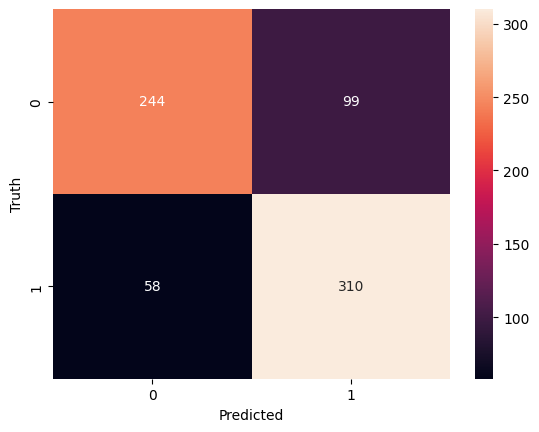

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76       343
           1       0.76      0.84      0.80       368

    accuracy                           0.78       711
   macro avg       0.78      0.78      0.78       711
weighted avg       0.78      0.78      0.78       711

